
# Panel를 활용한 데이터 시각화 및 대시보드 제작

이 노트북은 `Panel`과 `Plotly`를 사용하여 대화형 대시보드를 만드는 과정을 안내합니다. 각 섹션에는 예제와 실습이 포함되어 있어 개념을 이해하고 효과적으로 적용할 수 있도록 도와줍니다.

---

### 학습 목표:
1. Panel의 기본 개념을 이해합니다.
2. 대화형 시각화를 만드는 방법을 배웁니다.
3. 여러 요소를 결합하여 대시보드를 구축합니다.

---

**시작해봅시다!**


In [2]:
# 실습: 필요한 라이브러리 설치 (이미 설치되어 있다면 건너뛸 수 있습니다)
! pip install panel datashader hvplot jupyter_bokeh
# pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


### PANEL

Panel이란
- Python에서 데이터 대시보드와 웹 애플리케이션을 쉽게 생성할 수 있도록 도와주는 강력한 라이브러리입니다.
- 데이터를 시각화하고, 대화형 위젯과 통합하며, 웹 기반 대시보드를 빠르게 개발할 수 있습니다.

Panel의 구성 요소

Pane (패널):
- 데이터를 렌더링하는 가장 기본적인 단위입니다.
- 텍스트, 이미지, 그래프, HTML, Markdown 등 다양한 형식을 표시할 수 있습니다.

Widget (위젯):
- 사용자 입력을 처리하는 인터페이스 컴포넌트입니다.
- 슬라이더, 버튼, 텍스트 입력 등 다양한 위젯이 있습니다.

Template (템플릿):
- 대시보드의 기본 레이아웃을 설정합니다.

Layout (레이아웃):
- 여러 패널과 위젯을 정렬하고 배치하는 도구입니다.

### NOTEBOOK

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- `pn.extension()`은 Panel의 대화형 기능이 원활하게 작동하도록 필요한 준비 작업을 자동으로 수행하는 것입니다.
- 이 준비 작업에는 브라우저에서 필요한 리소스 로드와 설정이 포함됩니다.

In [3]:
import panel as pn
pn.extension()

EX


```PYTHON
    pn.extension(
        design="material", # UI 디자인 설정
        sizing_mode="stretch_width" # Panel 컴포넌트가 부모 컨테이너의 가로 폭 전체를 채우도록 설정
        )

        sizing_mode :
        - `fixed` : 고정 크기로 설정, 디스플레이 크기 변화에 영향을 받지 않음.
        - `stretch_height` : 높이를 부모 컨테이너 크기에 맞게 확장.
        - `stretch_both` : 가로와 세로를 모두 확장.
        - `stretch_width` : 가로 크기를 부모 컨테이너 크기에 맞게 확장
        - `scale_height, width, both` : 비율에 맞게 조정


   
        디자인      특징	                            주요 사용 사례
        `Default`     심플하고 중립적인 기본 스타일        일반적인 대시보드
        `Material`    현대적이고 직관적인 UI              세련된 대화형 애플리케이션
        `Bootstrap`   널리 알려진 구조와 반응형 디자인     Bootstrap 프로젝트와의 통합
        `Fast`	    빠른 렌더링과 미니멀한 디자인        고성능 대시보드
        `Bare`	    최소한의 스타일로 사용자 정의 가능   완전 커스텀 디자인이 필요한 경우

        등등

    pn.extension('plotly') # 확장기능 추가 가능

    ex. Tabulator, Vega, MathJax 등등
```

### EDITOR

앱에 패널 구성 요소를 추가하려면 .servable()로 표시하고 `panel serve app.ipynb --dev` 를 실행하여 앱에 서비스를 제공합니다
- 코드를 수정할 때마다 애플리케이션을 업데이트 함
``` py
        
    pn.template.MaterialTemplate(
        site="Panel",
        title="Getting Started App",
        sidebar=[variable_widget, window_widget, sigma_widget],
        main=[bound_plot],
    ).servable();
```


### Control Flow

- Panel에서 Parameter의 값과 Parameter 객체 자체의 차이점을 이해하는 것이 중요합니다.
- 값은 특정 순간의 현재 값을 나타내는 반면, 객체는 Parameter에 대한 정보를 포함하고 시간 경과에 따른 값에 대한 참조 역할을 합니다.
- 많은 경우 Parameter 객체를 활용할 수 있으며 Panel은 값이 변경될 때 반응적으로 값을 업데이트합니다.

In [ ]:
text = pn.widgets.TextInput()

text.value  # 👈 파라미터 값
text.param.value  # 👈 파라미터 객체

### Display and rendering

- Panel은 모든 선호하는 Python 라이브러리와 완벽하게 통합하고 특정 객체( DataFrame, 플로팅 Figure또는 다른 Python 객체)를 렌더링하는 방법을 자동으로 추론합니다.

- 즉, 렌더링하려는 객체를 레이아웃(예: 또는 Row) 에 손쉽게 배치할 수 있으며 Panel은 래핑할 Column적절한 유형을 자동으로 결정합니다 .
- Pane 유형에 따라 다양한 개체를 렌더링하는 방법을 알고 있을 뿐만 아니라 개체를 업데이트하거나 Vega/Altair 차트 또는 Plotly 플롯 선택과 같은 이벤트를 수신하는 방법도 제공합니다.
- 따라서 Pane 유형을 이해하는 것이 종종 유리합니다. 예를 들어, DataFramePane으로 래핑하려면 panel함수를 호출하면 자동으로 변환됩니다(이것은 렌더링할 객체가 주어졌을 때 레이아웃이 내부적으로 하는 일입니다).

In [ ]:
import pandas as pd
import panel as pn

pn.extension('vega')

In [ ]:
vegalite = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {"url": "https://raw.githubusercontent.com/vega/vega/master/docs/data/barley.json"},
  "mark": "bar",
  "encoding": {
    "x": {"aggregate": "sum", "field": "yield", "type": "quantitative"},
    "y": {"field": "variety", "type": "nominal"},
    "color": {"field": "site", "type": "nominal"}
  }
}
vgl_pane = pn.pane.Vega(vegalite, height=240)
vgl_pane

Vega(dict, height=240, selection=Selection)

In [ ]:
vegalite['mark'] = 'area'
vgl_pane.param.trigger('object')

In [ ]:
vega_disasters = {
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "data": {
    "url": "https://raw.githubusercontent.com/vega/vega/master/docs/data/disasters.csv"
  },
  "width": 600,
  "height": 400,
  "transform": [
    {"filter": "datum.Entity !== 'All natural disasters'"}
  ],
  "mark": {
    "type": "circle",
    "opacity": 0.8,
    "stroke": "black",
    "strokeWidth": 1
  },
  "encoding": {
    "x": {
        "field": "Year",
        "type": "quantitative",
        "axis": {"labelAngle": 90},
        "scale": {"zero": False}
    },
    "y": {
        "field": "Entity",
        "type": "nominal",
        "axis": {"title": ""}
    },
    "size": {
      "field": "Deaths",
      "type": "quantitative",
      "legend": {"title": "Annual Global Deaths", "clipHeight": 30},
      "scale": {"range": [0, 5000]}
    },
    "color": {"field": "Entity", "type": "nominal", "legend": None}
  }
}
vgl_pane.object = vega_disasters

In [ ]:
vgl_pane.object = vegalite

In [ ]:
import altair as alt
from vega_datasets import data

cars = data.cars()

chart = alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

altair_pane = pn.panel(chart)
altair_pane

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

Vega(Chart, selection=Selection)

- 때때로 개체에는 여러 개의 표현 중에서 선택할 수 있는 표현이 있을 수 있습니다.
- 이러한 경우 원하는 창 유형을 명시적으로 구성할 수 있습니다.

### Widgets

여러가지 위젯 : https://panel.holoviz.org/reference/index.html#widgets

- 대화형 애플리케이션을 제작하려면 일반적으로 위젯 구성 요소(예 TextInput: , FloatSlider, 또는 Checkbox)를 애플리케이션에 추가한 다음 대화형 함수에 바인딩합니다.

##### Slider

In [ ]:
import datetime as dt

import panel as pn

pn.extension()

In [ ]:
date_range_picker = pn.widgets.DateRangePicker(
    name='Date Range Picker', value=(dt.date(2020, 1, 1), dt.date(2020, 1, 10))
)

pn.Column(date_range_picker, height=400)

Column(height=400)
    [0] DateRangePicker(name='Date Range Picker', value=(datetime.date(2020, ...)

In [ ]:
date_range_picker.value

(datetime.date(2020, 1, 1), datetime.date(2020, 1, 10))

In [ ]:
pn.Row(date_range_picker.controls(jslink=True), date_range_picker)

Row
    [0] Tabs
        [0] WidgetBox(margin=(5, 10), name='Controls')
            [0] StaticText(value='<b>Controls</b>')
            [1] Checkbox(name='Disabled')
            [2] ListInput(name='Disabled dates', serializer='json', type=<class 'list'>)
            [3] ListInput(name='Enabled dates', serializer='json', type=<class 'list'>)
            [4] TextInput(description='An HTML string d..., name='Description')
        [1] WidgetBox(margin=(5, 10), name='Layout')
            [0] StaticText(value='<b>Layout</b>')
            [1] TextInput(description='String identifier f..., name='Name', value='Date Range Picker')
            [2] LiteralInput(description='Whether the object should..., name='Align', serializer='json', value='start')
            [3] LiteralInput(description='Describes the proportiona..., name='Aspect ratio', serializer='json')
            [4] ListInput(description='CSS classes t..., name='Css classes', serializer='json', type=<class 'list'>)
            [5] IntInput(description='The height of the compone..., name='Height', start=0)
            [6] IntInput(description='Minimal width o..., name='Min width', start=0)
            [7] IntInput(description='Minimal height o..., name='Min height', start=0)
            [8] IntInput(description='Minimal width o..., name='Max width', start=0)
            [9] IntInput(description='Minimal height o..., name='Max height', start=0)
            [10] LiteralInput(description='Allows to create addition..., name='Margin', serializer='json', value=(5, 10))
            [11] DictInput(description='Dictionary of C..., name='Styles', serializer='json', type=<class 'dict'>)
            [12] ListInput(description='List of arbitrary t..., name='Tags', serializer='json', type=<class 'list'>)
            [13] IntInput(description='Width of this c..., name='Width', start=0, value=300)
            [14] Select(description='Describes how the compone..., name='Width policy', options=OrderedDict([('auto', ...]), value='auto')
            [15] Select(description='Describes how the compone..., name='Height policy', options=OrderedDict([('auto', ...]), value='auto')
            [16] Select(description='How the component should ..., name='Sizing mode', options=OrderedDict([('fixed', ...]))
            [17] Checkbox(name='Visible', value=True)
    [1] DateRangePicker(name='Date Range Picker', value=(datetime.date(2020, ...)

In [ ]:
pn.Row(date_range_picker.controls(jslink=True), date_range_picker)

Row
    [0] Tabs
        [0] WidgetBox(margin=(5, 10), name='Controls')
            [0] StaticText(value='<b>Controls</b>')
            [1] Checkbox(name='Disabled')
            [2] ListInput(name='Disabled dates', serializer='json', type=<class 'list'>)
            [3] ListInput(name='Enabled dates', serializer='json', type=<class 'list'>)
            [4] TextInput(description='An HTML string d..., name='Description')
        [1] WidgetBox(margin=(5, 10), name='Layout')
            [0] StaticText(value='<b>Layout</b>')
            [1] TextInput(description='String identifier f..., name='Name', value='Date Range Picker')
            [2] LiteralInput(description='Whether the object should..., name='Align', serializer='json', value='start')
            [3] LiteralInput(description='Describes the proportiona..., name='Aspect ratio', serializer='json')
            [4] ListInput(description='CSS classes t..., name='Css classes', serializer='json', type=<class 'list'>)
            [5] IntInput(description='The height of the compone..., name='Height', start=0)
            [6] IntInput(description='Minimal width o..., name='Min width', start=0)
            [7] IntInput(description='Minimal height o..., name='Min height', start=0)
            [8] IntInput(description='Minimal width o..., name='Max width', start=0)
            [9] IntInput(description='Minimal height o..., name='Max height', start=0)
            [10] LiteralInput(description='Allows to create addition..., name='Margin', serializer='json', value=(5, 10))
            [11] DictInput(description='Dictionary of C..., name='Styles', serializer='json', type=<class 'dict'>)
            [12] ListInput(description='List of arbitrary t..., name='Tags', serializer='json', type=<class 'list'>)
            [13] IntInput(description='Width of this c..., name='Width', start=0, value=300)
            [14] Select(description='Describes how the compone..., name='Width policy', options=OrderedDict([('auto', ...]), value='auto')
            [15] Select(description='Describes how the compone..., name='Height policy', options=OrderedDict([('auto', ...]), value='auto')
            [16] Select(description='How the component should ..., name='Sizing mode', options=OrderedDict([('fixed', ...]))
            [17] Checkbox(name='Visible', value=True)
    [1] DateRangePicker(name='Date Range Picker', value=(datetime.date(2020, ...)

Folium

In [15]:
import folium
import panel as pn

pn.extension(sizing_mode="stretch_width")

In [16]:
m = folium.Map(location=[37.5668679397024, 127.172024343708], zoom_start=12)

folium_pane = pn.pane.plot.Folium(m, height=400)

folium_pane

Folium(Map, height=400)

In [17]:
# Add a marker to the map
folium.Marker(
    [37.5668679397024, 127.172024343708], popup="<i>Brandenburg Gate</i>", tooltip="Click me!"
).add_to(m)

folium_pane.object = m

##### Button

In [ ]:
import panel as pn
pn.extension()

In [ ]:
button = pn.widgets.Button(name='Click me', button_type='primary')
button

Button(button_type='primary', name='Click me')

In [ ]:
button.clicks

0

In [ ]:
indicator = pn.indicators.LoadingSpinner(value=False, size=25)

def update_indicator(event):
    if not event:
        return

    indicator.value = not indicator.value

pn.bind(update_indicator, button, watch=True)

pn.Column(button, indicator)

Column
    [0] Button(button_type='primary', name='Click me')
    [1] LoadingSpinner(size=25)

In [ ]:
def handle_click(clicks):
    return f'You have clicked me {clicks} times'

pn.Column(
    button,
    pn.bind(handle_click, button.param.clicks),
)

Column
    [0] Button(button_type='primary', name='Click me')
    [1] ParamFunction(function, _pane=Markdown, defer_load=False)

In [ ]:
text = pn.widgets.TextInput(value='Ready')

def b(event):
    text.value = 'Clicked {0} times'.format(button.clicks)

button.on_click(b)
pn.Row(button, text)

Row
    [0] Button(button_type='primary', name='Click me')
    [1] TextInput(value='Ready')

In [ ]:
pn.Row(
    *(pn.Column(*(pn.widgets.Button(name=p, button_type=p, button_style=bs) for p in pn.widgets.Button.param.button_type.objects))
    for bs in pn.widgets.Button.param.button_style.objects)
)

Row
    [0] Column
        [0] Button(name='default')
        [1] Button(button_type='primary', name='primary')
        [2] Button(button_type='success', name='success')
        [3] Button(button_type='warning', name='warning')
        [4] Button(button_type='danger', name='danger')
        [5] Button(button_type='light', name='light')
    [1] Column
        [0] Button(button_style='outline', name='default')
        [1] Button(button_style='outline', button_type='primary', name='primary')
        [2] Button(button_style='outline', button_type='success', name='success')
        [3] Button(button_style='outline', button_type='warning', name='warning')
        [4] Button(button_style='outline', button_type='danger', name='danger')
        [5] Button(button_style='outline', button_type='light', name='light')

In [ ]:
backward = pn.widgets.Button(name='\u25c0', width=50)
forward = pn.widgets.Button(name='\u25b6', width=50)
search = pn.widgets.Button(name='🔍', width=100)
save = pn.widgets.Button(name="💾 Save", width=100)
copy = pn.widgets.Button(name="Copy ✂️", width=100)

pn.Row(backward, forward, search, save, copy)

Row
    [0] Button(name='◀', width=50)
    [1] Button(name='▶', width=50)
    [2] Button(name='🔍', width=100)
    [3] Button(name='💾 Save', width=100)
    [4] Button(name='Copy ✂️', width=100)

In [ ]:
pn.Row(
    pn.widgets.Button(icon='alert-triangle-filled', button_type='warning', name='WARNING'),
    pn.widgets.Button(icon='bug', button_type='danger', name='Error')
)

Row
    [0] Button(button_type='warning', icon='alert-triangle-filled', name='WARNING')
    [1] Button(button_type='danger', icon='bug', name='Error')

In [ ]:
cash_icon = """
<svg xmlns="http://www.w3.org/2000/svg" class="icon icon-tabler icon-tabler-cash" width="24" height="24" viewBox="0 0 24 24" stroke-width="2" stroke="currentColor" fill="none" stroke-linecap="round" stroke-linejoin="round">
  <path stroke="none" d="M0 0h24v24H0z" fill="none"/>
  <path d="M7 9m0 2a2 2 0 0 1 2 -2h10a2 2 0 0 1 2 2v6a2 2 0 0 1 -2 2h-10a2 2 0 0 1 -2 -2z" />
  <path d="M14 14m-2 0a2 2 0 1 0 4 0a2 2 0 1 0 -4 0" />
  <path d="M17 9v-2a2 2 0 0 0 -2 -2h-10a2 2 0 0 0 -2 2v6a2 2 0 0 0 2 2h2" />
</svg>
"""

pn.widgets.Button(icon=cash_icon, button_type='success', name='Checkout', icon_size='2em')

Button(button_type='success', icon='\n<svg xmlns="http://www...., icon_size='2em', name='Checkout')

In [ ]:
pn.Row(button.controls, button)

Row
    [0] ParamMethod(method, _pane=Tabs, defer_load=False)
    [1] Button(button_type='primary', name='Click me')

### Panes

In [8]:
import folium
import panel as pn

pn.extension(sizing_mode="stretch_width")

In [19]:
m = folium.Map(location=[37.5687307561536, 127.176654612273], zoom_start=12)

folium_pane = pn.pane.plot.Folium(m, height=400)

folium_pane

Folium(Map, height=400)

In [21]:
# Add a marker to the map
folium.Marker(
    [37.5687307561536, 127.176654612273], popup="<i>Brandenburg Gate</i>", tooltip="Click me!"
).add_to(m)

folium_pane.object = m

https://panel.holoviz.org/reference/index.html#panes

In [4]:
import pandas as pd
import panel as pn

pn.extension()

In [5]:
df = pd.DataFrame({
    'int': [1, 2, 3],
    'float': [3.14, 6.28, 9.42],
    'str': ['A', 'B', 'C'],
    'bool': [True, False, True],
}, index=[1, 2, 3])

df_pane = pn.pane.DataFrame(df, width=400)

df_pane

DataFrame(DataFrame, width=400)

In [6]:
links = pd.DataFrame({
    "site": ["Docs", "Discourse", "Github", "Twitter"],
    "url": ["https://panel.holoviz.org/", "https://discourse.holoviz.org/", "https://github.com/holoviz/panel", "https://twitter.com/Panel_org"]
})
links["value"]="<a href='" + links["url"] + "' target='_blank'>" + links["site"] + "</a>"
pn.pane.DataFrame(links, escape=False, width=800, index=False)

DataFrame(DataFrame, escape=False, index=False, width=800)

다양한 데이터 유형을 시각화하는 툴 ( 텍스트, 이미지, 플롯 등 )
- Bokeh, Matplotlib, Plotly, Altair와 같은 플롯 라이브러리.
- 이미지(JPEG, PNG, SVG), 비디오(MP4), HTML, Markdown.
- 데이터 테이블이나 JSON.

##### Bokeh : 파이썬 시각화 툴

In [ ]:
import panel as pn
import numpy as np
import pandas as pd

pn.extension()

In [ ]:
from math import pi  # 파이를 계산하기 위한 모듈
from bokeh.palettes import Category20c  # 파이 차트의 색상을 제공하는 팔레트
from bokeh.plotting import figure  # Bokeh 플롯 생성 모듈
from bokeh.transform import cumsum  # 누적 합 계산을 위한 유틸리티
import pandas as pd  # 데이터프레임 처리를 위한 Pandas 라이브러리
import panel as pn  # Panel로 대시보드 생성

# 데이터 정의: 국가별 값으로 구성된 딕셔너리
x = {
    'United States': 157,
    'United Kingdom': 93,
    'Japan': 89,
    'China': 63,
    'Germany': 44,
    'India': 42,
    'Italy': 40,
    'Australia': 35,
    'Brazil': 32,
    'France': 31,
    'Taiwan': 31,
    'Spain': 29
}

# 데이터프레임으로 변환 및 파이 차트를 그리기 위한 각종 계산 추가
data = pd.Series(x).reset_index(name='value').rename(columns={'index': 'country'})
# 각 데이터의 비율을 각도로 변환 (전체 값에 대한 비율로 계산)
data['angle'] = data['value'] / data['value'].sum() * 2 * pi
# 파이 차트에 사용할 색상을 팔레트에서 선택
data['color'] = Category20c[len(x)] # 20까지 가능

# Bokeh 플롯 생성
p = figure(
    height=350,  # 플롯의 높이
    title="Pie Chart",  # 제목
    toolbar_location=None,  # 툴바 위치 (없음)
    tools="hover",  # 호버링 툴팁 활성화
    tooltips="@country: @value",  # 호버링 시 표시할 정보 (국가와 값)
    x_range=(-0.5, 1.0)  # 플롯의 X축 범위
)

# 파이 차트를 그리는 wedge(쐐기) 추가
r = p.wedge(
    x=0, y=1, radius=0.4,  # 파이 차트의 중심 좌표 (0, 1)와 반지름
    start_angle=cumsum('angle', include_zero=True),  # 각 쐐기의 시작 각도
    end_angle=cumsum('angle'),  # 각 쐐기의 끝 각도
    line_color="white",  # 쐐기 경계선 색
    fill_color='color',  # 쐐기의 채우기 색상 (팔레트에서 가져옴)
    legend_field='country',  # 범례에 표시될 필드
    source=data  # 데이터 소스
)

# X축, Y축 레이블 제거
p.axis.axis_label = None
# 축 자체를 보이지 않게 설정
p.axis.visible = False
# 그리드 라인을 제거
p.grid.grid_line_color = None

# Panel에서 사용할 Bokeh Pane 생성
bokeh_pane = pn.pane.Bokeh(
    p,  # 위에서 생성한 Bokeh 플롯
    theme="dark_minimal"  # 다크 테마 적용
)

# 결과: Bokeh Pane (Panel 내에서 시각화 가능)
bokeh_pane


Bokeh(figure, sizing_mode='stretch_width', theme='dark_minimal')

In [ ]:
from bokeh.layouts import column, row  # 레이아웃 설정을 위한 Bokeh 모듈
from bokeh.models import ColumnDataSource, Slider, TextInput  # 데이터와 위젯 정의 모듈
from bokeh.plotting import figure  # Bokeh 플롯 생성 모듈
import numpy as np  # 수학 연산을 위한 NumPy
import panel as pn  # Panel을 사용해 대시보드 생성

# Set up data
# 초기 데이터 생성
N = 200  # 데이터 포인트 수
x = np.linspace(0, 4 * np.pi, N)  # 0부터 4π까지 균등 간격으로 N개의 값 생성
y = np.sin(x)  # Sine 함수를 사용한 y 값 계산
source = ColumnDataSource(data=dict(x=x, y=y))  # Bokeh 데이터 소스 생성

# Set up plot
# 플롯 생성
plot = figure(
    height=400, width=400, title="my sine wave",  # 크기와 제목 설정
    tools="crosshair,pan,reset,save,wheel_zoom",  # 툴 추가
    x_range=[0, 4 * np.pi], y_range=[-2.5, 2.5]  # X, Y축 범위 설정
)
# 데이터 소스를 기반으로 Sine 곡선을 그리는 라인 추가
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

# Set up widgets
# 위젯 생성
text = TextInput(title="title", value='my sine wave')  # 텍스트 입력 (플롯 제목 변경용)
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)  # 오프셋 슬라이더
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0, step=0.1)  # 진폭 슬라이더
phase = Slider(title="phase", value=0.0, start=0.0, end=2 * np.pi)  # 위상 슬라이더
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1, step=0.1)  # 주파수 슬라이더

# Set up callbacks
# 텍스트 입력 위젯과 플롯 제목 연결
def update_title(attrname, old, new):
    plot.title.text = text.value  # 텍스트 입력 값을 플롯 제목으로 업데이트

text.on_change('value', update_title)  # 텍스트 변경 시 update_title 함수 실행

# 슬라이더 값 변경 시 데이터 업데이트
def update_data(attrname, old, new):
    # 슬라이더 값 가져오기
    a = amplitude.value  # 진폭
    b = offset.value  # 오프셋
    w = phase.value  # 위상
    k = freq.value  # 주파수

    # 새로운 Sine 곡선 데이터 생성
    x = np.linspace(0, 4 * np.pi, N)  # x 값 재계산
    y = a * np.sin(k * x + w) + b  # 슬라이더 값 반영하여 y 값 계산

    source.data = dict(x=x, y=y)  # 업데이트된 데이터를 ColumnDataSource에 전달

# 각 슬라이더에 데이터 업데이트 콜백 등록
for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)

# Set up layouts and add to document
# 입력 위젯과 플롯을 레이아웃에 배치
inputs = column(text, offset, amplitude, phase, freq)  # 입력 위젯을 세로로 배치
layout = row(inputs, plot, width=800)  # 입력 위젯과 플롯을 가로로 배치

# Panel을 사용해 Bokeh 애플리케이션을 Pane으로 감싸기
bokeh_app = pn.pane.Bokeh(layout)

# 결과: Panel 내에서 Bokeh 인터랙티브 플롯 표시
bokeh_app


Bokeh(Row)

##### PNG

In [ ]:
png_pane = pn.pane.PNG('https://assets.holoviz.org/panel/samples/png_sample.png')
png_pane

PNG(str)

### Templates

대시보드 애플리케이션을 빠르고 효율적으로 디자인할 수 있도록 도와주는 프레임워크


템플릿 종류
 - `MaterialTemplate`	: Google Material Design, 스타일 현대적이고 직관적인 UI
 - `VanillaTemplate` : 커스터마이징 가능한 기본 HTML, 완전히 사용자 정의된 디자인
 - `FastListTemplate` : 반응형 리스트 레이아웃, 모바일 및 간단한 대시보드
 - `FastGridTemplate` : MaterialTemplate, VanillaTemplate 달리 그리드에서 구성요소의 크기를 조정하고 재정렬 가능
 - `GoldenTemplate` : 복잡한 다중 창 레이아웃, 복잡한 대시보드
 - `BootstrapTemplate` : Bootstrap 스타일, Bootstrap 기반 디자인 사용
 - `ReactTemplate` : React.js 스타일, 현대적인 SPA 스타일 애플리케이션

Launching server at http://localhost:45995


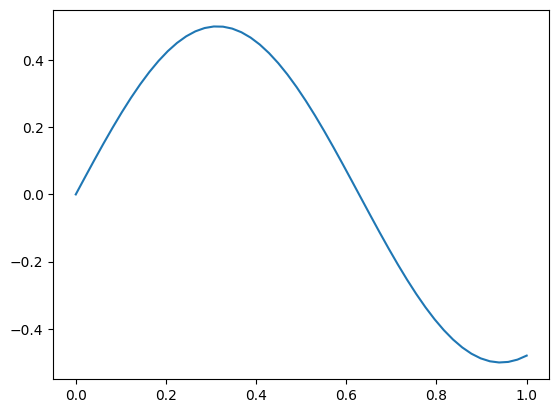

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
import hvplot.pandas  # Interactive plots

# Panel 확장 로드 및 Material 템플릿 사용
pn.extension(template='material')

# 주파수(Frequency) 슬라이더 생성
# 시작값: 0, 끝값: 10, 초기값: 5
freq = pn.widgets.FloatSlider(
    name='Frequency', start=0, end=10, value=5
).servable(target='sidebar')  # 슬라이더를 MaterialTemplate의 사이드바에 추가

# 진폭(Amplitude) 슬라이더 생성
# 시작값: 0, 끝값: 1, 초기값: 0.5
ampl = pn.widgets.FloatSlider(
    name='Amplitude', start=0, end=1, value=0.5
).servable(target='sidebar')  # 슬라이더를 MaterialTemplate의 사이드바에 추가

# Sine 곡선을 그리는 함수 정의
def plot(freq, ampl):
    fig = plt.figure()  # 새로운 Matplotlib figure 생성
    ax = fig.add_subplot(111)  # 단일 플롯 생성
    xs = np.linspace(0, 1)  # 0부터 1까지 균일한 간격의 x 값 생성
    ys = np.sin(xs * freq) * ampl  # 주어진 주파수(freq)와 진폭(ampl)을 사용해 y 값 계산
    ax.plot(xs, ys)  # Sine 곡선 플롯
    return fig  # Matplotlib figure 반환

# Matplotlib 플롯을 Panel에 표시하기 위한 Pane 생성
# pn.bind를 사용해 슬라이더 값을 plot 함수에 바인딩
mpl = pn.pane.Matplotlib(
    pn.bind(plot, freq, ampl),  # plot 함수에 freq, ampl 슬라이더 연결
    sizing_mode='stretch_width'  # 가로 폭을 부모 컨테이너에 맞게 확장
)

# MaterialTemplate 생성 및 구성
pn.template.MaterialTemplate(
    site="Panel",           # 사이트 이름 설정
    title="Sine curve",     # 대시보드 제목
    sidebar=[freq, ampl],   # 사이드바에 두 슬라이더 추가
    main=[mpl],             # 메인 영역에 Matplotlib 플롯 추가
).servable().show()         # 대시보드 실행


In [ ]:
import panel as pn
import panel
# Panel 확장 로드
pn.extension(sizing_mode="stretch_width")

# 샘플 데이터
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [10, 20, 15, 25]
})

# 플롯 생성
bar_plot = data.hvplot.bar(x='Category', y='Values', title="Sample Bar Plot")

# 위젯 생성
slider = pn.widgets.IntSlider(name="Adjust Value", start=0, end=100, step=5)
table = pn.widgets.DataFrame(data, name="Data Table", height=200)

# FastGridTemplate 생성
template = pn.template.FastGridTemplate(
    title="FastGridTemplate Example",
    site="My Dashboard",
    logo="https://via.placeholder.com/150",  # 로고 URL
    sidebar=[slider],  # 사이드바 콘텐츠
    sidebar_footer="<p>Footer content here</p>",  # 사이드바 하단 HTML
    theme="dark",  # 다크 테마
    accent_base_color="#F08080",  # 강조 색상
)

# main에 위치 및 크기 지정
template.main[0:3, 0:8] = pn.Card(bar_plot, title="Bar Plot", background="#FFFFFF")  # 첫 3행, 8열
template.main[3:6, 0:2] = pn.Card(slider, title="Slider Widget", background="#E8E8E8")  # 다음 3행, 2열
template.main[3:6, 2:4] = pn.Card(table, title="Data Table", background="#F5F5F5")  # 다음 3행, 나머지 2열

# 대시보드 실행
template.show()


TypeError: Card.__init__() got an unexpected keyword argument 'background'

### APP Gallery

###### penguin

In [ ]:
import numpy as np
import pandas as pd
import panel as pn

import holoviews as hv
import hvplot.pandas # noqa

pn.extension(template='fast')

pn.state.template.logo = 'https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/logo.png'

In [ ]:
penguins = pd.read_csv('https://datasets.holoviz.org/penguins/v1/penguins.csv')
penguins = penguins[~penguins.sex.isnull()].reset_index().sort_values('species')

penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
94,100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,female,2009
95,101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,male,2009
96,102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,female,2009
97,103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,male,2009


In [ ]:
ls = hv.link_selections.instance()

def count(selected):
    return f"## {len(selected)}/{len(penguins)} penguins selected"

selected = pn.pane.Markdown(
    pn.bind(count, ls.selection_param(penguins)),
    align='center', width=400, margin=(0, 100, 0, 0)
)

header = pn.Row(
    pn.layout.HSpacer(), selected,
    sizing_mode='stretch_width'
).servable(area='header')

selected

Markdown(str, align='center', design=<class 'panel.theme.materi..., margin=(0, 100, 0, 0), width=400)

In [ ]:
colors = {
    'Adelie': '#1f77b4',
    'Gentoo': '#ff7f0e',
    'Chinstrap': '#2ca02c'
}

scatter = penguins.hvplot.points(
    'bill_length_mm', 'bill_depth_mm', c='species',
    cmap=colors, responsive=True, min_height=300
)

histogram = penguins.hvplot.hist(
    'body_mass_g', by='species', color=hv.dim('species').categorize(colors),
    legend=False, alpha=0.5, responsive=True, min_height=300
)

bars = penguins.hvplot.bar(
    'species', 'index', c='species', cmap=colors,
    responsive=True, min_height=300, ylabel=''
).aggregate(function=np.count_nonzero)

violin = penguins.hvplot.violin(
    'flipper_length_mm', by=['species', 'sex'], cmap='Category20',
    responsive=True, min_height=300, legend='bottom_right'
).opts(split='sex')

plots = pn.pane.HoloViews(
    ls(scatter.opts(show_legend=False) + bars + histogram + violin).opts(sizing_mode='stretch_both').cols(2)
).servable(title='Palmer Penguins')

plots

HoloViews(Layout, design=<class 'panel.theme.materi..., sizing_mode='stretch_both')

##### Windturbines

In [ ]:
import holoviews as hv
import panel as pn
import pandas as pd

pn.extension('vizzu', 'tabulator', design='material', template='material')
import hvplot.pandas

In [ ]:
windturbines = pn.state.as_cached(
    'windturbines',
    pd.read_parquet,
    path='https://datasets.holoviz.org/windturbines/v1/windturbines.parq'
)

windturbines.head()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,easting,northing
0,3072661,None,None,5149.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,0,NaN,2,3,2018-05-08,Digital Globe,-118.363762,35.077908,-1.317619e+07,4.174474e+06
1,3072695,None,None,5143.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,0,NaN,2,3,2018-05-08,Digital Globe,-118.364410,35.077435,-1.317627e+07,4.174409e+06
2,3072704,None,None,5146.0,52161.0,CA,Kern County,6029,251 Wind,1987.0,...,0,NaN,2,3,2018-05-08,Digital Globe,-118.364197,35.077644,-1.317624e+07,4.174438e+06
3,3063272,19-028134,2014-WTE-4084-OE,NaN,NaN,IA,Story County,19169,30 MW Iowa DG Portfolio,2017.0,...,0,NaN,3,3,2017-04-24,Digital Globe,-93.430367,42.028233,-1.040062e+07,5.165210e+06
4,3053390,19-028015,2015-WTE-6386-OE,NaN,NaN,IA,Boone County,19015,30 MW Iowa DG Portfolio,2017.0,...,0,NaN,3,3,2017-06-01,Digital Globe,-93.700424,41.977608,-1.043068e+07,5.157626e+06


In [ ]:
def data(df, groupby, quant):
    if quant == 'Count':
        return df.value_counts(groupby).to_frame(name='Count').sort_index().reset_index().iloc[:50]
    else:
        return df.groupby(groupby)[quant].sum().reset_index().iloc[:50]

def config(chart_type, groupby, quant):
    if chart_type == 'Bubble Chart':
        return {
            "channels": {
                "x": None,
                "y": None,
                "color": groupby,
                "label": groupby,
                "size": quant
            },
            'geometry': 'circle'
        }
    else:
        return {
            "channels": {
                "x": groupby,
                "y": quant,
                "color": None,
                "label": None,
                "size": None
            },
            'geometry': 'rectangle'
        }

ls = hv.link_selections.instance()

geo = ls(windturbines.hvplot.points(
    'easting', 'northing', xaxis=None, yaxis=None, rasterize=True,
    tiles='CartoLight', responsive=True, dynspread=True,
    height=500, cnorm='log', cmap='plasma', xlim=(-14000000, -8000000),
    ylim=(3000000, 6500000)
))

groupby = pn.widgets.RadioButtonGroup(
    options={'State': 't_state', 'Year': 'p_year', 'Manufacturer': 't_manu'}, align='center'
)
chart_type = pn.widgets.RadioButtonGroup(
    options=['Bar Chart', 'Bubble Chart'], align='center'
)
quant = pn.widgets.RadioButtonGroup(
    options={'Count': 'Count', 'Capacity': 'p_cap'}, align='center'
)
lsdata = ls.selection_param(windturbines)

vizzu = pn.pane.Vizzu(
    pn.bind(data, lsdata, groupby, quant),
    config=pn.bind(config, chart_type, groupby, quant),
    column_types={'p_year': 'dimension'},
    style={
        "plot": {
            "xAxis": {
                "label": {
                    "angle": "-45deg"
                }
            }
        }
    },
    sizing_mode='stretch_both'
)

def format_df(df):
    df = df[['t_state', 't_county', 'p_name', 'p_year', 't_manu', 't_cap']]
    return df.rename(
        columns={col: col.split('_')[1].title() for col in df.columns}
    )


table = pn.widgets.Tabulator(
    pn.bind(format_df, lsdata), page_size=8, pagination='remote',
    show_index=False,
)

pn.Column(
    pn.Row(quant, "# by", groupby, "# as a", chart_type).servable(area='header'),
    pn.Column(
        pn.Row(geo, table),
        vizzu, min_height=1000,
        sizing_mode='stretch_both'
    ).servable(title='Windturbines')
)

Output hidden; open in https://colab.research.google.com to view.

### Ladybug Dashboard

In [ ]:
import panel as pn
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import hvplot.pandas

ACCENT = "#BB2649"
RED = "#D94467"
GREEN = "#5AD534"

CSV_FILE = "/content/drive/MyDrive/panel-main/data/ladybug_final.csv"

pn.extension("plotly", "tabulator", sizing_mode="stretch_width")

In [ ]:
############### 0. 데이터 불러오기 ###############
@pn.cache #  데이터가 클 때 사용하면 항상 같은 데이터를 불러옴
def get_data():
    return pd.read_csv(CSV_FILE)

data = get_data()

In [ ]:
############### 1. 무당이와 도보의 비율 및 수량 (파이 차트) ###############
mode_counts = data['transportation'].value_counts()

def create_pie_chart(counts):
    fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values, hole=0.3)])
    fig.update_layout(title="무당이와 도보의 비율", template="plotly_dark", width=400, height=400)
    return fig

mode_ratio_chart = pn.pane.Plotly(create_pie_chart(mode_counts))

In [ ]:
############### 2. 무당이와 도보 평균 통행 시간 ###############

# 사용자 정의 색상 설정
colors = {'ladybug': 'blue', 'foot': 'red'}

avg_time = data.copy()

avg_time['duration'] = avg_time.apply(
    lambda row: row['ladybug_total_duration'] if row['transportation'] == 'ladybug' else row['foot_total_duration'],
    axis=1
)

avg_time_chart_data = avg_time.groupby('transportation')['duration'].mean().reset_index()

# Plotly 막대 그래프 생성
fig = go.Figure()

# 막대 추가 (각 이동 방식에 대해)
for transport in ['ladybug', 'foot']:
    filtered_data = avg_time_chart_data[avg_time_chart_data['transportation'] == transport]
    fig.add_trace(
        go.Bar(
            x=filtered_data['transportation'],
            y=filtered_data['duration'],
            name=transport.capitalize(),  # 범례 이름 설정
            marker=dict(color=colors[transport])  # 색상 지정
        )
    )

# 레이아웃 설정
fig.update_layout(
    title="평균 통행 시간 (분)",
    xaxis=dict(title="이동 방식"),
    yaxis=dict(title="평균 통행 시간 (분)"),
    barmode='group',  # 막대를 그룹화
    legend=dict(title="Transportation", x=1.05, y=1),  # 범례 위치 및 제목 설정
    template='plotly_dark',  # 다크 테마
    width=400,
    height=400
)

# Panel에서 사용하기 위한 Plotly Pane 생성
avg_time_chart = pn.pane.Plotly(fig)

In [ ]:

############### 3. 무당이와 도보 평균 통행 거리 비교 ###############
avg_distance = data.copy()

# 이동 속도 (m/min)
foot_speed_m_min = 5 * (1000 / 60)  # 도보 속도
ladybug_speed_m_min = 17 * (1000 / 60)  # 무당벌레 속도

# 거리 계산 (미터 단위로 변환)
avg_distance['distance'] = avg_distance.apply(
    lambda row: row['ladybug_total_duration'] * ladybug_speed_m_min
    if row['transportation'] == 'ladybug'
    else row['foot_total_duration'] * foot_speed_m_min,
    axis=1
)

avg_distance_chart_data = avg_distance.groupby('transportation')['distance'].mean().reset_index()

# Plotly 막대 그래프 생성
fig = go.Figure()

# 막대 추가 (각 이동 방식에 대해)
for transport, color in zip(['ladybug', 'foot'], ['blue', 'red']):
    filtered_data = avg_distance_chart_data[avg_distance_chart_data['transportation'] == transport]
    fig.add_trace(
        go.Bar(
            x=filtered_data['transportation'],
            y=filtered_data['distance'],
            name=transport.capitalize(),  # 범례 이름 설정
            marker=dict(color=color)  # 색상 지정
        )
    )

# 레이아웃 설정
fig.update_layout(
    title="평균 통행 거리 (m)",
    xaxis=dict(title="이동 방식"),
    yaxis=dict(title="평균 통행 거리 (m)"),
    barmode='group',  # 막대를 그룹화
    template='plotly_dark',  # 다크 테마
    width=400,
    height=400
)

# Panel에서 사용하기 위한 Plotly Pane 생성
avg_distance_chart = pn.pane.Plotly(fig)

In [ ]:
############### 4. 시간별 인원수 계산 ###############
data['hour'] = data['start_time'].apply(lambda x: int(x // 60))
hourly_count = data.groupby('hour').size().reset_index(name='count')

# Plotly 선 그래프 생성
fig = go.Figure()

# 선 그래프 추가
fig.add_trace(
    go.Scatter(
        x=hourly_count['hour'],
        y=hourly_count['count'],
        mode='lines',  # 선 그래프
        line=dict(color='blue', width=2),  # 선 색상과 두께
        name='Line'
    )
)

# 산점도 추가
fig.add_trace(
    go.Scatter(
        x=hourly_count['hour'],
        y=hourly_count['count'],
        mode='markers',  # 점만 표시
        marker=dict(color='red', size=10),  # 점 색상과 크기
        name='Scatter'
    )
)

# 레이아웃 설정
fig.update_layout(
    title="시간별 인원수",
    xaxis=dict(title="시간대 (시)", range=[9, 18]),  # x축 범위 설정
    yaxis=dict(title="인원수"),
    template='plotly_dark',  # 다크 테마
    width=400,
    height=400
)

# Panel에서 사용하기 위한 Plotly Pane 생성
hourly_count_chart = pn.pane.Plotly(fig)

In [ ]:
############## 5. 데이터 테이블
data_table = pn.widgets.Tabulator(
    data,
    pagination="remote",
    page_size=6,
    layout="fit_data_fill"
)

In [ ]:
############### 대시보드 생성 함수 ###############
def create_dashboard():
    grid = pn.GridSpec(sizing_mode='scale_both', max_width=1200)
    grid[0:3, 0:3] = mode_ratio_chart
    grid[0:3, 3:6] = hourly_count_chart
    grid[0:3, 6:9] = avg_distance_chart
    grid[0:3, 9:12] = avg_time_chart
    grid[3:5, :] = data_table

    dashboard = pn.template.FastGridTemplate(
        title="무당이 대시보드",
        accent_base_color=ACCENT,
        header_background=ACCENT,
        prevent_collision=True,
        save_layout=True,
        theme_toggle=False,
        theme='dark',
        main=grid,
    )

    return dashboard

############### 대시보드 실행 ###############
dashboard = create_dashboard()
# dashboard.servable()
dashboard.show()

Launching server at http://localhost:35341


In [ ]:
############### 대시보드 저장 ###############
dashboard.save('/content/drive/MyDrive/panel-main/docs/dashboard-2.html')

### 깃허브에 호스팅